In [3]:
# IMPORTING PACKAGES

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [4]:
# IMPORTING DATA

df = pd.read_csv('house.csv')
#df.set_index('Id', inplace = True)

df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.dropna(inplace = True)

print(cl(df.isnull().sum(), attrs = ['bold']))

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
print(cl(df.dtypes, attrs = ['bold']))

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [8]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
df.dtypes   

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [10]:
df_obj = df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]

In [11]:
cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df.drop(columns=cols, axis=1, inplace=True)

In [12]:
df_obj.replace({'yes': 1, 'no': 0}, inplace=True)

C:\Users\namita namita\AppData\Local\Temp\ipykernel_20916\1832459241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj.replace({'yes': 1, 'no': 0}, inplace=True)


In [13]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
parking              int64
furnishingstatus    object
dtype: object

In [14]:
result = pd.concat([df, df_obj], axis=1)

In [15]:
df = result

In [16]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
parking              int64
furnishingstatus    object
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
prefarea             int64
dtype: object

In [17]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [18]:
mapping = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}
# Replace values in the DataFrame column
df['furnishingstatus'] = df['furnishingstatus'].replace(mapping)

In [19]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
parking             int64
furnishingstatus    int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
prefarea            int64
dtype: object

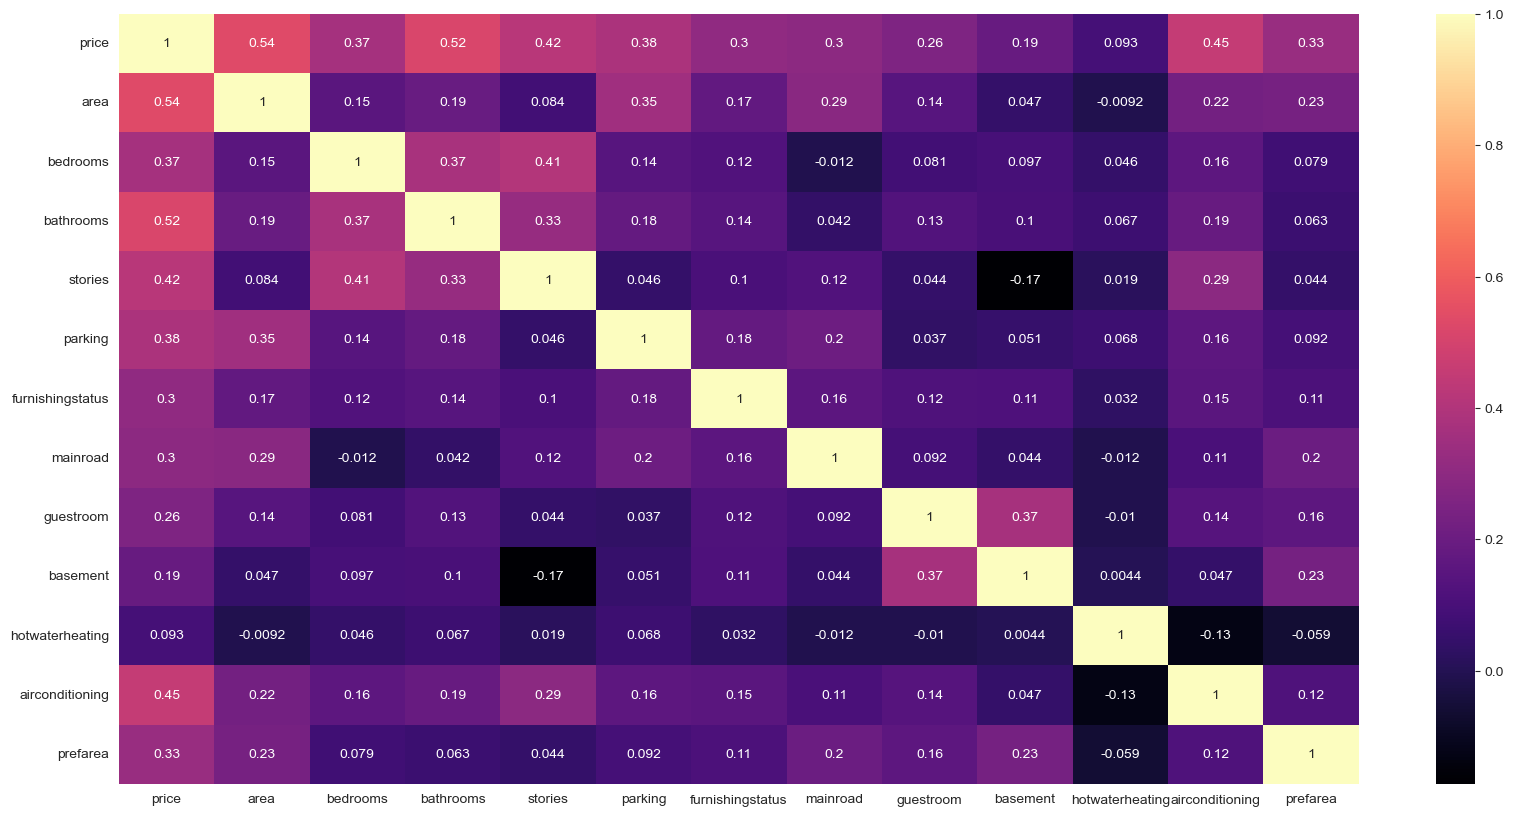

In [20]:
sb.heatmap(df.corr(), annot = True, cmap = 'magma')

plt.savefig('heatmap.png')
plt.show()

C:\Users\namita namita\AppData\Local\Temp\ipykernel_20916\2087339113.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['price'], color = 'r')


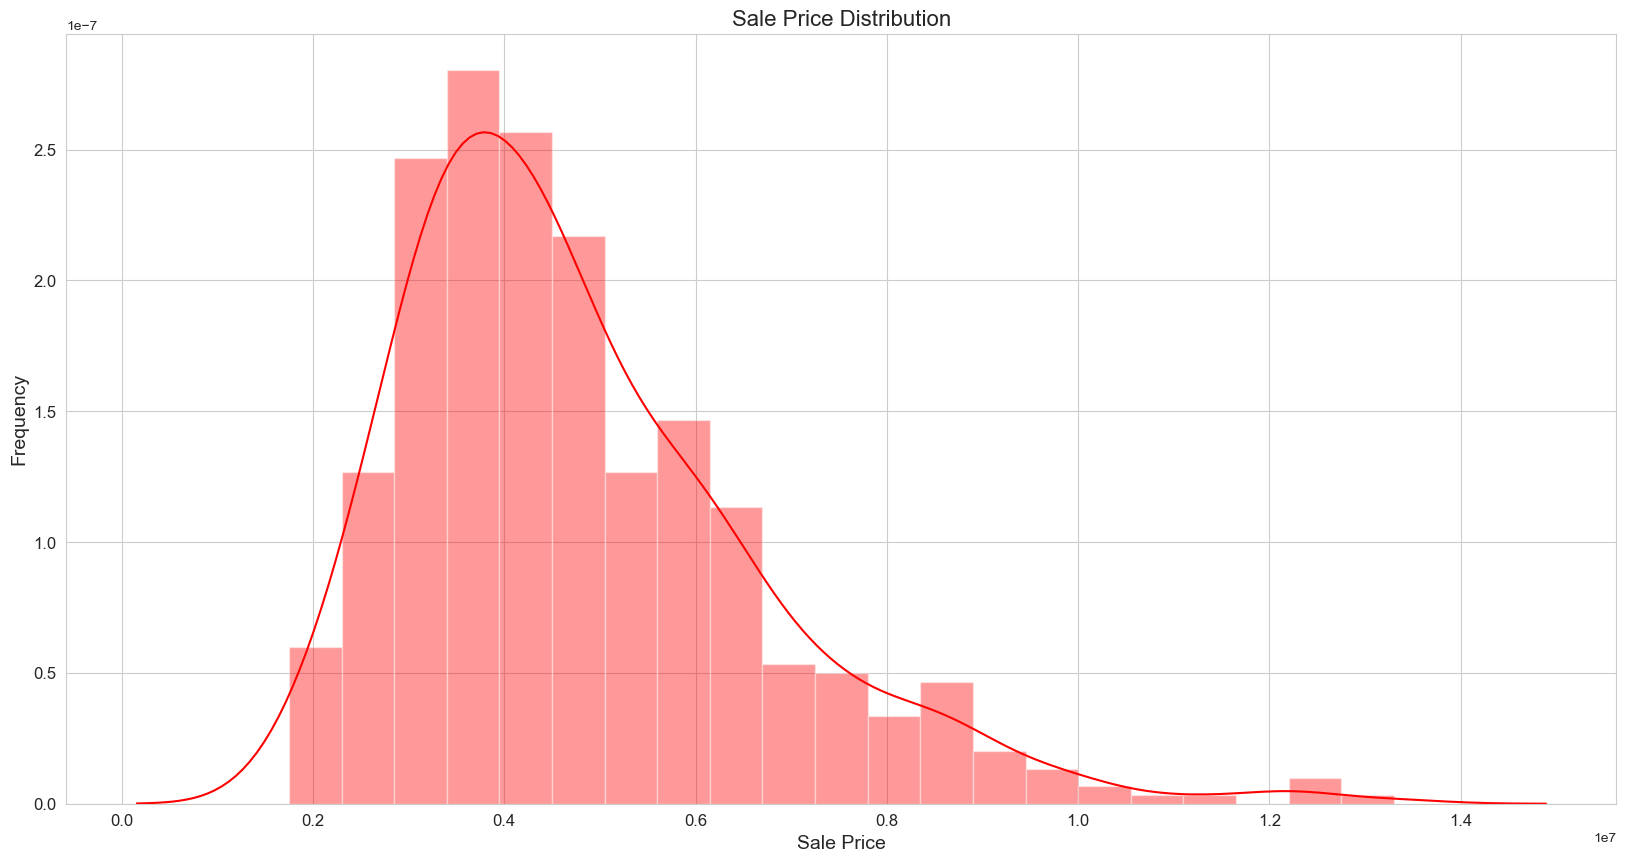

In [21]:
# 3. Distribution plot

sb.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [22]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'prefarea'],
      dtype='object')

In [23]:
# FEATURE SELECTION & DATA SPLIT

X_var = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking','furnishingstatus', 'mainroad', 'guestroom', 'basement','hotwaterheating', 'airconditioning', 'prefarea']].values
y_var = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:5])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:5])

X_train samples :  [[3620    2    1    1    0    0    1    0    0    0    0    0]
 [4000    2    1    1    0    0    1    0    0    0    0    0]
 [3040    2    1    1    0    0    0    0    0    0    0    0]
 [3600    2    1    1    0    0    1    0    0    0    0    0]
 [9860    3    1    1    0    1    1    0    0    0    0    0]]
X_test samples :  [[ 4000     3     1     2     1     2     1     0     0     0     0     0]
 [ 9620     3     1     1     2     2     1     0     1     0     0     1]
 [ 3460     4     1     2     0     1     1     0     0     0     1     0]
 [13200     2     1     1     1     2     1     0     1     1     0     0]
 [ 3660     4     1     2     0     0     0     0     0     0     0     0]]
y_train samples :  [1750000 2695000 2870000 2590000 4515000]
y_test samples :  [4585000 6083000 4007500 6930000 2940000]


In [24]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)

# 2. Ridge

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, y_train)
ridge_yhat = ridge.predict(X_test)

# 3. Lasso

lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)
lasso_yhat = lasso.predict(X_test)

# 4. Bayesian

bayesian = BayesianRidge()
bayesian.fit(X_train, y_train)
bayesian_yhat = bayesian.predict(X_test)

# 5. ElasticNet

en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_yhat = en.predict(X_test)


In [25]:
# 1. Explained Variance Score

print(cl('EXPLAINED VARIANCE SCORE:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Ridge model is {}'.format(evs(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Lasso model is {}'.format(evs(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of Bayesian model is {}'.format(evs(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('Explained Variance Score of ElasticNet is {}'.format(evs(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')

EXPLAINED VARIANCE SCORE:
-------------------------------------------------------------------------------
Explained Variance Score of OLS model is 0.6602066022534315
-------------------------------------------------------------------------------
Explained Variance Score of Ridge model is 0.6623839100734403
-------------------------------------------------------------------------------
Explained Variance Score of Lasso model is 0.6602066207018495
-------------------------------------------------------------------------------
Explained Variance Score of Bayesian model is 0.3082740738568548
-------------------------------------------------------------------------------
Explained Variance Score of ElasticNet is 0.6683188108945501
-------------------------------------------------------------------------------


In [26]:
# 2. R-squared

print(cl('R-SQUARED:', attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of OLS model is {}'.format(r2(y_test, ols_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Ridge model is {}'.format(r2(y_test, ridge_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Lasso model is {}'.format(r2(y_test, lasso_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of Bayesian model is {}'.format(r2(y_test, bayesian_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')
print(cl('R-Squared of ElasticNet is {}'.format(r2(y_test, en_yhat)), attrs = ['bold']))
print('-------------------------------------------------------------------------------')


R-SQUARED:
-------------------------------------------------------------------------------
R-Squared of OLS model is 0.6578047592637593
-------------------------------------------------------------------------------
R-Squared of Ridge model is 0.660028208997669
-------------------------------------------------------------------------------
R-Squared of Lasso model is 0.6578047780540675
-------------------------------------------------------------------------------
R-Squared of Bayesian model is 0.30733471538073576
-------------------------------------------------------------------------------
R-Squared of ElasticNet is 0.6660909095825679
-------------------------------------------------------------------------------


<h5>SERIALIZE</h5>

In [27]:
from joblib import dump

# Assuming your model is named 'model'
model_file = 'house_price_prediction_model.joblib'  # Choose a filename for your serialized model
dump(en, model_file)

['house_price_prediction_model.joblib']